<a href="https://colab.research.google.com/github/AdhamelGazar/ASL-classification/blob/main/asl_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Download and unzipping the data*

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adhamamr3","key":"44168fbbd818667be54252e916c566b1"}'}

In [5]:
 !mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!cp kaggle.json ~/.kaggle/

In [7]:
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!pwd

/content


In [9]:
!mkdir dataset

In [10]:
%cd /content/dataset

/content/dataset


In [11]:
!pwd

/content/dataset


In [12]:
!kaggle datasets download -d grassknoted/asl-alphabet

100% 1.02G/1.03G [00:06<00:00, 174MB/s]
100% 1.03G/1.03G [00:06<00:00, 165MB/s]


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
!unzip /content/dataset/asl-alphabet.zip

Streaming output truncated to the last 5000 lines.
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing19.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing190.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1900.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1901.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1902.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1903.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1904.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1905.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1906.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1907.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1908.jpg  
  inflating: asl_alphabet_train/asl_alphabet_train/nothing/nothing1909.jpg  
  inflating: asl_alphabet_tr

# Exploring the dataset

In [15]:
%cd /content/dataset/asl_alphabet_train/asl_alphabet_train

/content/dataset/asl_alphabet_train/asl_alphabet_train


In [16]:
!pwd

/content/dataset/asl_alphabet_train/asl_alphabet_train


In [17]:
import os

In [18]:
print(f"We have a total number of {len(os.listdir('./'))} classes")

We have a total number of 29 classes


In [19]:
for folder in os.listdir('./'):
  images = [x for x in os.listdir(f'./{folder}') if (x.endswith('.jpg') or x.endswith('.jpeg'))]
  print(f'{folder} : {len(images)} images')

Z : 3000 images
W : 3000 images
B : 3000 images
N : 3000 images
X : 3000 images
K : 3000 images
F : 3000 images
V : 3000 images
del : 3000 images
E : 3000 images
U : 3000 images
P : 3000 images
G : 3000 images
S : 3000 images
O : 3000 images
Y : 3000 images
Q : 3000 images
space : 3000 images
C : 3000 images
H : 3000 images
D : 3000 images
nothing : 3000 images
R : 3000 images
J : 3000 images
T : 3000 images
I : 3000 images
L : 3000 images
M : 3000 images
A : 3000 images


# Reading and Showing Data

In [20]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [21]:
img = cv.imread('/content/dataset/asl_alphabet_train/asl_alphabet_train/A/A1.jpg')

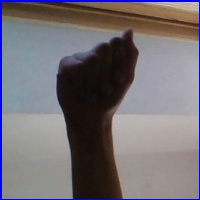

In [22]:
cv2_imshow(img)

In [23]:
img.shape

(200, 200, 3)

# Data Generator

In [24]:
import tensorflow.keras as keras
import numpy as np
from sklearn.model_selection import train_test_split

In [25]:
CLASSES_labels = {}
for index, folder in enumerate(os.listdir('./')):
  if folder.startswith('.'):
    continue
  CLASSES_labels[folder] = index

In [26]:
CLASSES_labels

{'A': 28,
 'B': 2,
 'C': 18,
 'D': 20,
 'E': 9,
 'F': 6,
 'G': 12,
 'H': 19,
 'I': 25,
 'J': 23,
 'K': 5,
 'L': 26,
 'M': 27,
 'N': 3,
 'O': 14,
 'P': 11,
 'Q': 16,
 'R': 22,
 'S': 13,
 'T': 24,
 'U': 10,
 'V': 7,
 'W': 1,
 'X': 4,
 'Y': 15,
 'Z': 0,
 'del': 8,
 'nothing': 21,
 'space': 17}

In [27]:
images_paths = []
images_labels = []
for folder in os.listdir('./'):
  images = [folder + '/' + x for x in os.listdir(f'./{folder}') if (x.endswith('.jpg') or x.endswith('.jpeg'))]
  images_paths = images_paths + images
  label = CLASSES_labels[folder]
  images_labels = images_labels + [label] * len(images)

In [28]:
len(images_paths), len(images_labels)

(87000, 87000)

In [29]:
print(list(zip(images_paths[::1000], images_labels[::1000])))

[('Z/Z470.jpg', 0), ('Z/Z1610.jpg', 0), ('Z/Z2653.jpg', 0), ('W/W1502.jpg', 1), ('W/W2461.jpg', 1), ('W/W2117.jpg', 1), ('B/B1085.jpg', 2), ('B/B720.jpg', 2), ('B/B293.jpg', 2), ('N/N97.jpg', 3), ('N/N989.jpg', 3), ('N/N1266.jpg', 3), ('X/X2131.jpg', 4), ('X/X1654.jpg', 4), ('X/X110.jpg', 4), ('K/K1201.jpg', 5), ('K/K1443.jpg', 5), ('K/K2740.jpg', 5), ('F/F58.jpg', 6), ('F/F1130.jpg', 6), ('F/F813.jpg', 6), ('V/V2603.jpg', 7), ('V/V1441.jpg', 7), ('V/V1488.jpg', 7), ('del/del1880.jpg', 8), ('del/del1712.jpg', 8), ('del/del1395.jpg', 8), ('E/E753.jpg', 9), ('E/E2609.jpg', 9), ('E/E434.jpg', 9), ('U/U2000.jpg', 10), ('U/U2654.jpg', 10), ('U/U1298.jpg', 10), ('P/P1091.jpg', 11), ('P/P637.jpg', 11), ('P/P1875.jpg', 11), ('G/G2291.jpg', 12), ('G/G66.jpg', 12), ('G/G2038.jpg', 12), ('S/S2585.jpg', 13), ('S/S596.jpg', 13), ('S/S2066.jpg', 13), ('O/O2245.jpg', 14), ('O/O1077.jpg', 14), ('O/O2219.jpg', 14), ('Y/Y1490.jpg', 15), ('Y/Y2205.jpg', 15), ('Y/Y1707.jpg', 15), ('Q/Q424.jpg', 16), ('Q/Q

In [31]:
images_paths_train, images_paths_test, images_labels_train, images_labels_test = train_test_split(images_paths, images_labels, test_size=0.1, stratify=images_labels, random_state=42)
images_paths_train, images_paths_validation, images_labels_train, images_labels_validation = train_test_split(images_paths_train, images_labels_train, test_size=0.1, stratify=images_labels_train, random_state=42)

In [32]:
len(images_paths_train), len(images_paths_validation), len(images_paths_test)

(70470, 7830, 8700)

In [33]:
import numpy as np


In [34]:
class DataGenerator(keras.utils.Sequence):
  'Generates data for Keras'
  def __init__(self, list_IDs, labels, batch_size=16, dim=(64,128), n_channels=1,
              n_classes=29, shuffle=True):
    'Initialization'
    self.dim = dim
    self.batch_size = batch_size
    self.labels = labels
    self.list_IDs = list_IDs
    self.n_channels = n_channels
    self.n_classes = n_classes
    self.shuffle = shuffle
    self.on_epoch_end()

  def __len__(self):
    'Denotes the number of steps per epoch'
    return int(np.floor(len(self.list_IDs) / self.batch_size))

  def __getitem__(self, index):
    'Generate one batch of data'
    # Generate indexes of the batch
    indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

    # Find list of IDs
    list_IDs_temp = [self.list_IDs[k] for k in indexes]
    list_labels_temp = [self.labels[k] for k in indexes]

    # Generate data
    X, y = self.__data_generation(list_IDs_temp, list_labels_temp)

    return X, y

  def on_epoch_end(self):
    'Updates indexes after each epoch'
    self.indexes = np.arange(len(self.list_IDs))
    if self.shuffle == True:
        np.random.shuffle(self.indexes)

  def __data_generation(self, list_IDs_temp, list_labels_temp):
    'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
    # Initialization
    X = np.empty((self.batch_size, *self.dim, self.n_channels))
    y = np.empty((self.batch_size), dtype=int)

    # Generate data
    for i, ID in enumerate(list_IDs_temp):
        # Store sample
        img = cv.imread(ID,cv.IMREAD_GRAYSCALE)
        img_resized = cv.resize(img, self.dim[::-1])          
        X[i,] =  np.expand_dims(img_resized, axis=2)

        # Store class
        y[i] = list_labels_temp[i]

    return X, keras.utils.to_categorical(y, num_classes=self.n_classes)


In [35]:
train_generator = DataGenerator(list_IDs= images_paths_train, labels= images_labels_train)
validation_generator = DataGenerator(list_IDs= images_paths_validation, labels= images_labels_validation)
test_generator = DataGenerator(list_IDs= images_paths_test, labels= images_labels_test)

(16, 64, 128, 1)
(16, 29)


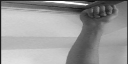

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]


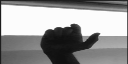

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0.]


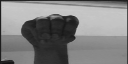

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]


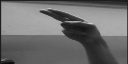

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


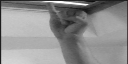

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0.]


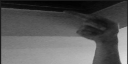

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


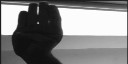

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


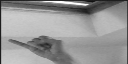

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0.]


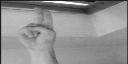

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


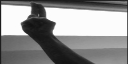

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


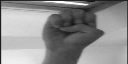

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


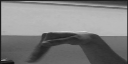

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


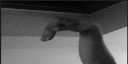

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


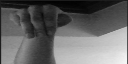

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0.]


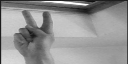

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


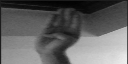

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [36]:
for images, labels in train_generator:
  print(images.shape)
  print(labels.shape)
  for index in range(len(labels)):
    cv2_imshow(images[index])
    print(labels[index])
  break

# Model Dev

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense, Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint

In [38]:
model = tf.keras.Sequential()
model.add(Input(shape=(64,128, 1)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 126, 128)      1280      
_________________________________________________________________
dropout (Dropout)            (None, 62, 126, 128)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 126, 128)      512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 124, 128)      147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 62, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 62, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 62, 128)       5

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
acc_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Best acc/best_accuracy.h5', monitor="val_accuracy")


In [41]:
model.fit(x = train_generator,
          validation_data = validation_generator,
          epochs=20,
          callbacks=[acc_checkpoint])

Epoch 1/20
4404/4404 [==============================] - 509s 108ms/step - loss: 1.4139 - accuracy: 0.5563 - val_loss: 1.1027 - val_accuracy: 0.6557
Epoch 2/20
4404/4404 [==============================] - 475s 108ms/step - loss: 0.4403 - accuracy: 0.8517 - val_loss: 0.4304 - val_accuracy: 0.8646
Epoch 3/20
4404/4404 [==============================] - 474s 108ms/step - loss: 0.2341 - accuracy: 0.9207 - val_loss: 0.1452 - val_accuracy: 0.9507
Epoch 4/20
4404/4404 [==============================] - 476s 108ms/step - loss: 0.1324 - accuracy: 0.9553 - val_loss: 0.0950 - val_accuracy: 0.9665
Epoch 5/20
4404/4404 [==============================] - 476s 108ms/step - loss: 0.1035 - accuracy: 0.9652 - val_loss: 0.0323 - val_accuracy: 0.9882
Epoch 6/20
4404/4404 [==============================] - 476s 108ms/step - loss: 0.0879 - accuracy: 0.9704 - val_loss: 0.0093 - val_accuracy: 0.9980
Epoch 7/20
4404/4404 [==============================] - 475s 108ms/step - loss: 0.0679 - accuracy: 0.9777 - val_

KeyboardInterrupt: ignored

# **Evaluating model**

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model = load_model('/content/drive/MyDrive/Best acc/best_accuracy.h5')

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 126, 128)      1280      
_________________________________________________________________
dropout (Dropout)            (None, 62, 126, 128)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 126, 128)      512       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 124, 128)      147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 62, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 62, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 62, 128)       5

In [45]:
test_generator = DataGenerator(list_IDs= images_paths_test, labels= images_labels_test, batch_size=120, shuffle=False)

In [46]:
y_pred = []
y_true = []
for images, labels in test_generator:
  labels_pred = model.predict(images)
  labels_pred = np.argmax(labels_pred, axis=1)
  labels = np.argmax(labels, axis=1)
  y_pred += list(labels_pred)
  y_true += list(labels)

  


  

In [48]:
len(y_pred), len(y_true)

(8640, 8640)

In [49]:
from sklearn.metrics import classification_report

In [50]:
target_names = list(CLASSES_labels.keys())

In [51]:
CLASSES_labels.keys()

dict_keys(['Z', 'W', 'B', 'N', 'X', 'K', 'F', 'V', 'del', 'E', 'U', 'P', 'G', 'S', 'O', 'Y', 'Q', 'space', 'C', 'H', 'D', 'nothing', 'R', 'J', 'T', 'I', 'L', 'M', 'A'])

In [52]:
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           Z       1.00      1.00      1.00       297
           W       1.00      0.99      0.99       299
           B       1.00      1.00      1.00       298
           N       1.00      1.00      1.00       298
           X       1.00      1.00      1.00       297
           K       1.00      1.00      1.00       296
           F       1.00      1.00      1.00       299
           V       0.99      1.00      0.99       297
         del       1.00      1.00      1.00       297
           E       1.00      1.00      1.00       298
           U       1.00      1.00      1.00       299
           P       1.00      1.00      1.00       299
           G       1.00      1.00      1.00       298
           S       1.00      1.00      1.00       294
           O       1.00      1.00      1.00       300
           Y       1.00      1.00      1.00       297
           Q       1.00      1.00      1.00       299
       space       1.00    